In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Read the data
df = pd.read_csv(r'C:\Users\ADMIN\Downloads\Data Portfolio\Movies - Python\movies.csv')

In [2]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [3]:
# Data Exploration - Analyse for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [4]:
# Updating numeric columns with 'Nan' to their mean

df['budget'] = df['budget'].fillna((df['budget'].mean()))
df['gross'] = df['gross'].fillna((df['gross'].mean()))

In [5]:
# Data Exploration - Analyse for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [6]:
# Data Types

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [7]:
# Convert datatype

df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [8]:
# Extracting year from the 'released' column

df['Released_Month'] = df['released'].astype(str).str[:4]
df['Released_Year'] = df['released'].str.split(',').str[1]
df['Released_Year'] = df['Released_Year'].astype(str).str[:5]

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime Released_Month Released_Year  
0   46998772        Warner Bros.    146.0           June          1980  
1   58853106   Columbia Pictures    104.0           July          1980  
2  538375067           Lucasfilm    124.0           June          1980  
3   83453539  Paramount Pictures     88.0           July          1980  
4   39846344      Orion Pictures     98.0           July          1980

In [9]:
# Sort values based on highest Gross

pd.set_option('display.max_rows',None)

#df.sort_values(by=['gross'],inplace =False, ascending=False)

In [10]:
# Drop any duplicates


df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [11]:
# Budget High correlation
# Company High Correlation

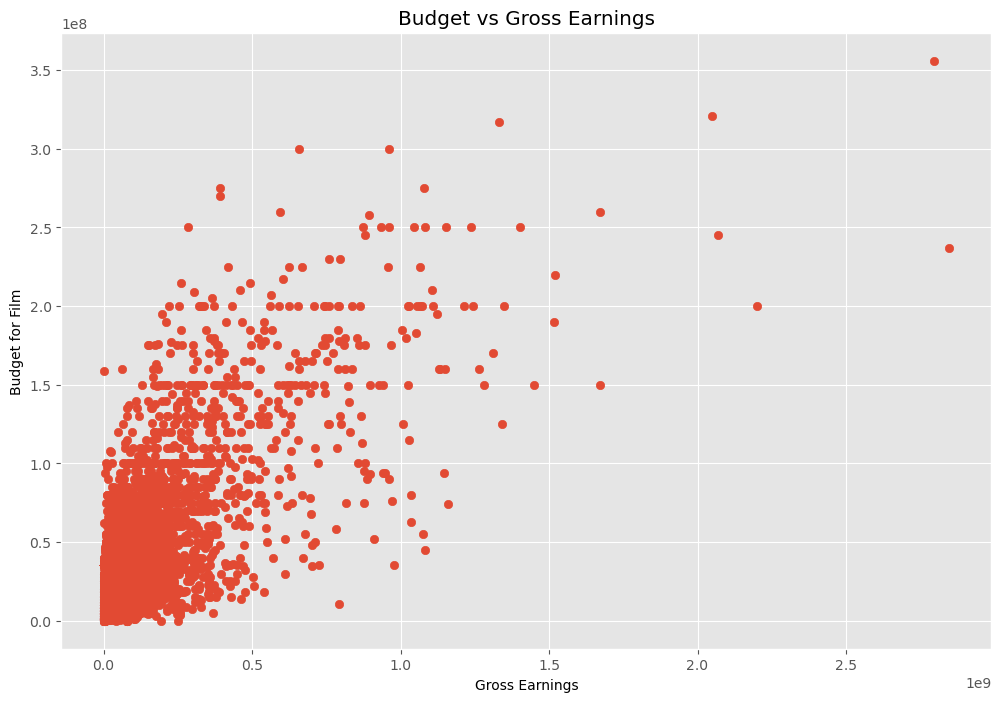

In [12]:
# Scatter Plot with Budget vs Gross

plt.scatter(x=df['gross'],y =df['budget'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

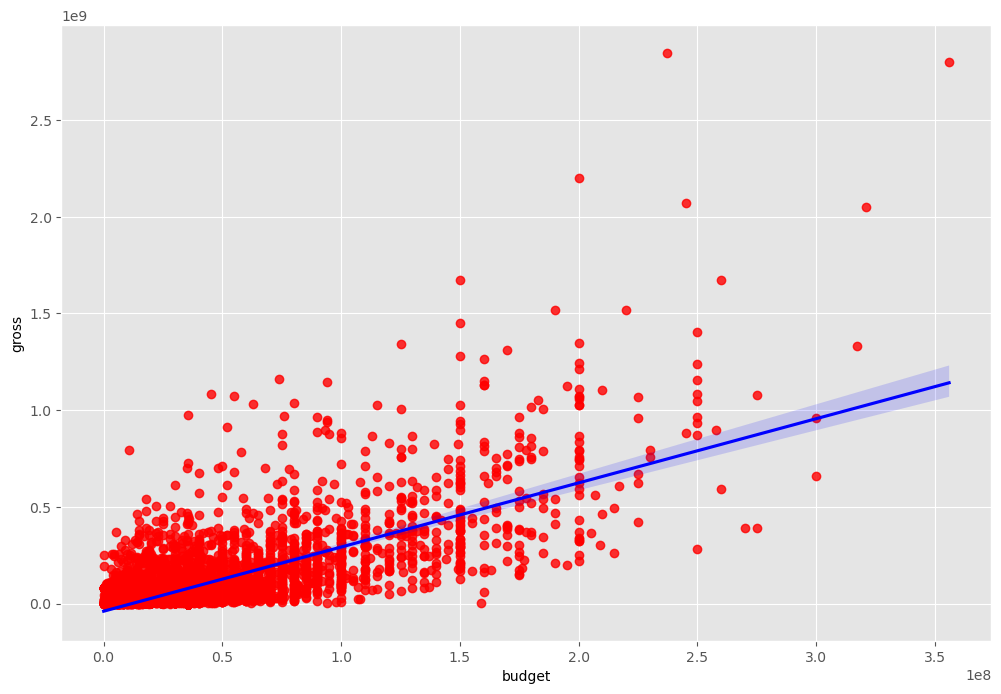

In [13]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data =df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [14]:
# Correlation only works on numerical fields)

df.corr(method='pearson') #pearson, kendall, spearman

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8364\1001214494.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson') #pearson, kendall, spearman


year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.265578  0.252042  0.120811
score    0.097995  1.000000  0.409182  0.064554  0.182868  0.399451
votes    0.222945  0.409182  1.000000  0.421090  0.628713  0.309212
budget   0.265578  0.064554  0.421090  1.000000  0.711270  0.265305
gross    0.252042  0.182868  0.628713  0.711270  1.000000  0.241336
runtime  0.120811  0.399451  0.309212  0.265305  0.241336  1.000000

In [15]:
# High correlation between budget and Gross

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8364\4211429671.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr(method='pearson')


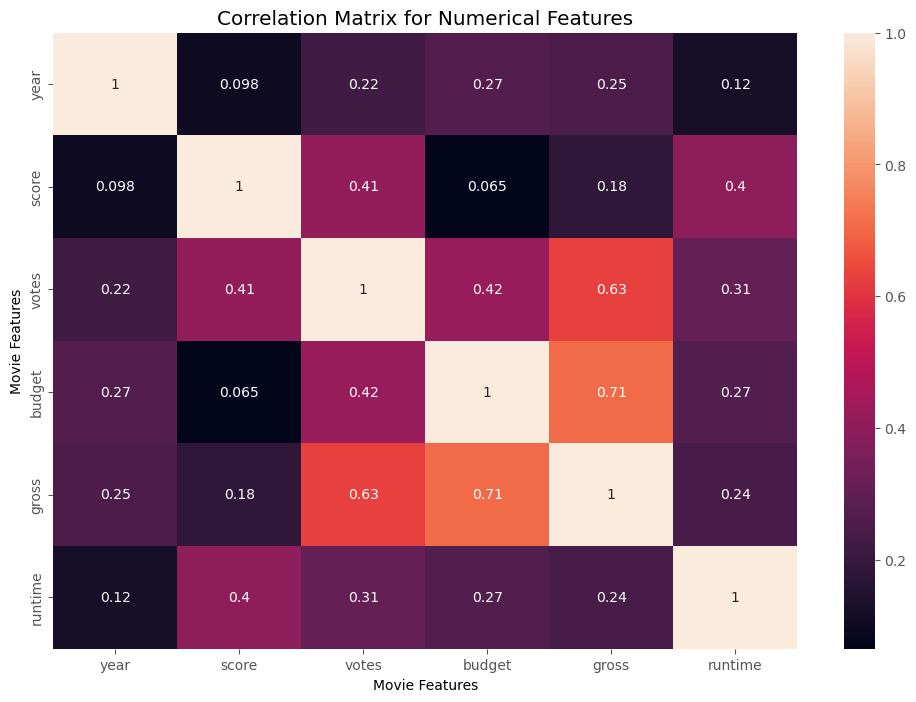

In [16]:
corr_matrix=df.corr(method='pearson')

sns.heatmap(corr_matrix, annot=True)

plt.title('Correlation Matrix for Numerical Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [17]:
# Focus on Company

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime Released_Month Released_Year  
0   46998772        Warner Bros.    146.0           June          1980  
1   58853106   Columbia Pictures    104.0           July          1980  
2  538375067           Lucasfilm    124.0           June          1980  
3   83453539  Paramount Pictures     88.0           July          1980  
4   39846344      Orion Pictures     98.0           July          1980

In [18]:
df_numerized = df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized     

name  rating  genre  year  released  score      votes  director  writer  \
0     6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1     5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2     5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3      286       4      4  1980      1492    7.7   221000.0      1301    2000   
4     1027       6      4  1980      1543    7.3   108000.0      1054     521   
5     2109       6     10  1980      2502    6.4   123000.0      2528    4362   
6     5574       6      0  1980      1771    7.9   188000.0      1412     838   
7     4436       6      3  1980       699    8.2   330000.0      1829    1769   
8     5281       4      0  1980      1753    6.8   101000.0      2306    1979   
9     6213       6      3  1980      2286    7.0    10000.0      2864     423   
10     463       4      0  1980       674    6.1    18000.0       357    3985   
11    5920       4      1  1980      2987    7.3    54000.0      1199    1832   
12    4315       4      1  1980       626    5.3    30000.0      2352    2333   
13    4084       6      6  1980      3211    7.7    49000.0      2388    2327   
14    1687       6      5  1980      1543    7.1    37000.0       318     520   
15    5024       4      6  1980      3021    7.2    27000.0      1243    3548   
16    1900       6      6  1980      2286    6.6    21000.0        49     735   
17      92       4      4  1980       699    6.9    29000.0       514    3262   
18    5865       6     10  1980      1108    6.8    66000.0      1374    2104   
19    5189       6      4  1980       626    6.8    26000.0      2561     556   
20    1387       6      5  1980       945    6.5    20000.0      2891    4451   
21    2451       6      1  1980       160    6.8    14000.0      1892    2926   
22    5845       4      0  1980       281    6.7    22000.0       744    4192   
23    7445       4      8  1980       585    5.3    12000.0      2371    3528   
24    7127       4      6  1980      1913    6.4    14000.0      1153      12   
25     346       6     10  1980       773    6.9    33000.0      1583    3234   
26    3263       6      4  1980      2059    6.5     5100.0      2433    2483   
27    4442       4      0  1980       281    5.0     4100.0      1282      33   
28     980       6      5  1980      1771    7.2    17000.0      2673    4386   
29     362       6      5  1980       886    6.2    22000.0      2151    3326   
30    3796       4      4  1980      3296    7.1     8900.0      2811      83   
31    4373       6     10  1980      1467    5.4    16000.0      2143    4455   
32    4987       4      0  1980       342    5.3    15000.0      1041    1587   
33    1103       4      6  1980       160    6.1      604.0      1644     958   
34    4785       4      4  1980       699    6.7     9100.0      1225    3136   
35    4362       6      4  1980      2818    6.2    24000.0      1091    3107   
36    6008       6      4  1980      2452    6.3     4300.0       855    1358   
37    3721       6      4  1980      2965    6.0    11000.0      1598    3642   
38    6102       4      6  1980       699    5.9     4000.0      2296    3826   
39    1244       4      3  1980      2195    7.5    17000.0      1884    4201   
40    6748       4      7  1980      3101    6.3     5700.0      1403     518   
41     927       4      6  1980      1588    7.9    13000.0       335    2252   
42    6644       6      0  1980      1836    7.1     9000.0      2314    2543   
43    7305       6      3  1980       169    6.6    11000.0       186    1682   
44    5504       6     10  1980      3042    4.8     2000.0      1978     151   
45    1152       6      4  1980      1467    6.1    12000.0      2804    4298   
46    6094       6      0  1980      1705    5.3     3900.0      1934    3357   
47    5578       6     10  1980      2775    4.6     3900.0      2836    4344   
48    6360       4      0  1980      

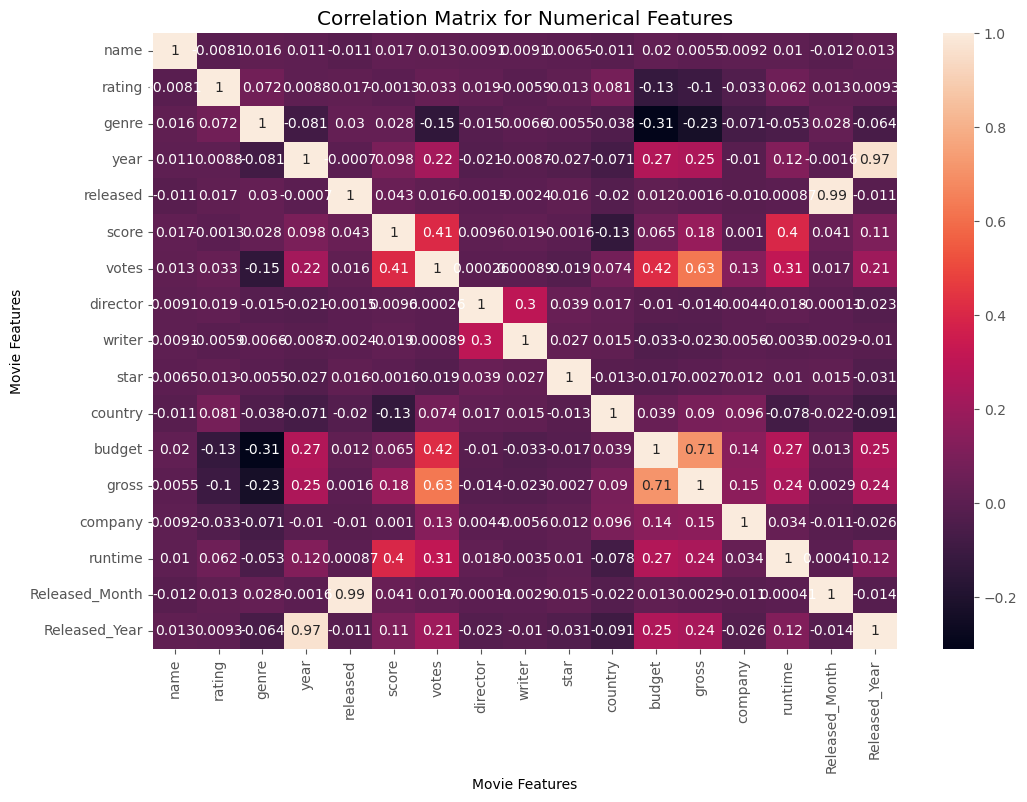

In [19]:
corr_matrix=df_numerized.corr(method='pearson')

sns.heatmap(corr_matrix, annot=True)

plt.title('Correlation Matrix for Numerical Features')

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [20]:
df_numerized.corr()

name    rating     genre      year  released     score  \
name            1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating         -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre           0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year            0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released       -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score           0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes           0.013088  0.033225 -0.145307  0.222945  0.016097  0.409182   
director        0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer          0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star            0.006472  0.013405 -0.005477 -0.027242  0.015777 -0.001609   
country        -0.010737  0.081244 -0.037615 -0.070938 -0.020427 -0.133348   
budget          0.020368 -0.126046 -0.310566  0.265578  0.012263  0.064554   
gross           0.005466 -0.102116 -0.230267  0.252042  0.001636  0.182868   
company         0.009211 -0.032943 -0.071067 -0.010431 -0.010474  0.001030   
runtime         0.010392  0.062145 -0.052711  0.120811  0.000868  0.399451   
Released_Month -0.011725  0.013475  0.028397 -0.001562  0.993694  0.040993   
Released_Year   0.012835  0.009280 -0.063573  0.967486 -0.010573  0.107219   

                   votes  director    writer      star   country    budget  \
name            0.013088  0.009079  0.009081  0.006472 -0.010737  0.020368   
rating          0.033225  0.019483 -0.005921  0.013405  0.081244 -0.126046   
genre          -0.145307 -0.015258  0.006567 -0.005477 -0.037615 -0.310566   
year            0.222945 -0.020795 -0.008656 -0.027242 -0.070938  0.265578   
released        0.016097 -0.001478 -0.002404  0.015777 -0.020427  0.012263   
score           0.409182  0.009559  0.019416 -0.001609 -0.133348  0.064554   
votes           1.000000  0.000260  0.000892 -0.019282  0.073625  0.421090   
director        0.000260  1.000000  0.299067  0.039234  0.017490 -0.010364   
writer          0.000892  0.299067  1.000000  0.027245  0.015343 -0.033216   
star           -0.019282  0.039234  0.027245  1.000000 -0.012998 -0.016628   
country         0.073625  0.017490  0.015343 -0.012998  1.000000  0.039000   
budget          0.421090 -0.010364 -0.033216 -0.016628  0.039000  1.000000   
gross           0.628713 -0.014272 -0.023210 -0.002682  0.089949  0.711270   
company         0.133204  0.004404  0.005646  0.012442  0.095548  0.144851   
runtime         0.309212  0.017624 -0.003511  0.010174 -0.078412  0.265305   
Released_Month  0.017337 -0.000105 -0.002892  0.015406 -0.022277  0.013096   
Released_Year   0.206475 -0.022579 -0.010063 -0.031166 -0.090962  0.252811   

                   gross   company   runtime  Released_Month  Released_Year  
name            0.005466  0.009211  0.010392       -0.011725       0.012835  
rating         -0.102116 -0.032943  0.062145        0.013475       0.009280  
genre          -0.230267 -0.071067 -0.052711        0.028397      -0.063573  
year            0.252042 -0.010431  0.120811       -0.001562       0.967486  
released        0.001636 -0.010474  0.000868        0.993694      -0.010573  
score           0.182868  0.001030  0.399451        0.040993       0.107219  
votes           0.628713  0.133204  0.309212        0.017337       0.206475  
director       -0.014272  0.004404  0.017624       -0.000105      -0.022579  
writer         -0.023210  0.005646 -0.003511       -0.002892      -0.010063  
star           -0.002682  0.012442  0.010174        0.015406      -0.031166  
country         0.089949  0.095548 -0.078412       -0.022277      -0.090962  
budget          0.711270  0.144851  0.265305        0.013096       0.252811  
gross           1.000000  0.152694  0.241336        0.002904       0.235487  
company         0.152694  1.000000  0.034402       -0.010726      -0.026492  
runtime         0.241336  0.034402  1.00

In [21]:
correlation_mat = df_numerized.corr()

correlation_pairs = correlation_mat.unstack()

correlation_pairs

name            name              1.000000
                rating           -0.008069
                genre             0.016355
                year              0.011453
                released         -0.011311
                score             0.017097
                votes             0.013088
                director          0.009079
                writer            0.009081
                star              0.006472
                country          -0.010737
                budget            0.020368
                gross             0.005466
                company           0.009211
                runtime           0.010392
                Released_Month   -0.011725
                Released_Year     0.012835
rating          name             -0.008069
                rating            1.000000
                genre             0.072423
                year              0.008779
                released          0.016613
                score            -0.001314
           

In [22]:
correlation_pairs_sorted = correlation_pairs.sort_values()

correlation_pairs_sorted

budget          genre            -0.310566
genre           budget           -0.310566
                gross            -0.230267
gross           genre            -0.230267
votes           genre            -0.145307
genre           votes            -0.145307
score           country          -0.133348
country         score            -0.133348
budget          rating           -0.126046
rating          budget           -0.126046
                gross            -0.102116
gross           rating           -0.102116
country         Released_Year    -0.090962
Released_Year   country          -0.090962
genre           year             -0.081261
year            genre            -0.081261
runtime         country          -0.078412
country         runtime          -0.078412
genre           company          -0.071067
company         genre            -0.071067
year            country          -0.070938
country         year             -0.070938
Released_Year   genre            -0.063573
genre      

In [23]:
High_correlation_pairs = correlation_pairs_sorted[(correlation_pairs_sorted) > 0.5]

High_correlation_pairs

gross           votes             0.628713
votes           gross             0.628713
gross           budget            0.711270
budget          gross             0.711270
Released_Year   year              0.967486
year            Released_Year     0.967486
Released_Month  released          0.993694
released        Released_Month    0.993694
name            name              1.000000
writer          writer            1.000000
runtime         runtime           1.000000
company         company           1.000000
gross           gross             1.000000
budget          budget            1.000000
country         country           1.000000
star            star              1.000000
director        director          1.000000
votes           votes             1.000000
score           score             1.000000
released        released          1.000000
year            year              1.000000
genre           genre             1.000000
rating          rating            1.000000
Released_Mo

In [24]:
# Votes and budget have highest correlation to gross earnings

# Company has low correlation